In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

Define the autoencoder model

In [ ]:
def autoencoder(input_dim, encoding_dim):
    # Encoder
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(encoding_dim, activation='relu')(input_layer)#non linearity

    # Decoder
    decoded = Dense(input_dim, activation='sigmoid')(encoded)

    # Autoencoder
    autoencoder = Model(input_layer, decoded)

    # Separate encoder model
    encoder = Model(input_layer, encoded)

    # Separate decoder model
    encoded_input = Input(shape=(encoding_dim,))
    decoder_layer = autoencoder.layers[-1]
    decoder = Model(encoded_input, decoder_layer(encoded_input))
    return autoencoder, encoder, decoder

Load Fashion MNIST dataset

In [ ]:
(x_train, _), (x_test, _) = tf.keras.datasets.fashion_mnist.load_data()#training labels
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.#normalizes
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))#flattens the image
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

4422102/4422102 [==============================] - 0s 0us/step


Set parameters

In [ ]:
input_dim = 784  # Fashion MNIST dataset size 28x28
encoding_dim = 32  # Size of the compressed representation

Create autoencoder model

In [ ]:
autoencoder_model, encoder_model, decoder_model = autoencoder(input_dim, encoding_dim)

Compile model

In [ ]:
autoencoder_model.compile(optimizer='adam', loss='binary_crossentropy')

Train the autoencoder

In [ ]:
autoencoder_model.fit(x_train, x_train,
                      epochs=20,
                      batch_size=256,
                      shuffle=True,
                      validation_data=(x_test, x_test))

Epoch 1/20
235/235 [==============================] - 4s 12ms/step - loss: 0.4134 - val_loss: 0.3405
Epoch 2/20
235/235 [==============================] - 3s 13ms/step - loss: 0.3259 - val_loss: 0.3182
Epoch 3/20
235/235 [==============================] - 4s 16ms/step - loss: 0.3107 - val_loss: 0.3075
Epoch 4/20
235/235 [==============================] - 3s 15ms/step - loss: 0.3015 - val_loss: 0.3000
Epoch 5/20
235/235 [==============================] - 3s 12ms/step - loss: 0.2947 - val_loss: 0.2945
Epoch 6/20
235/235 [==============================] - 3s 12ms/step - loss: 0.2908 - val_loss: 0.2917
Epoch 7/20
235/235 [==============================] - 3s 14ms/step - loss: 0.2886 - val_loss: 0.2899
Epoch 8/20
235/235 [==============================] - 3s 14ms/step - loss: 0.2872 - val_loss: 0.2893
Epoch 9/20
235/235 [==============================] - 3s 13ms/step - loss: 0.2862 - val_loss: 0.2880
Epoch 10/20
235/235 [==============================] - 3s 12ms/step - loss: 0.2855 - val_lo

Save trained models

In [ ]:
autoencoder_model.save('autoencoder_model.h5')
encoder_model.save('encoder_model.h5')
decoder_model.save('decoder_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Load trained models

In [ ]:
autoencoder_model = tf.keras.models.load_model('autoencoder_model.h5')
encoder_model = tf.keras.models.load_model('encoder_model.h5')
decoder_model = tf.keras.models.load_model('decoder_model.h5')

Encode and decode some images

In [ ]:
encoded_imgs = encoder_model.predict(x_test)
decoded_imgs = decoder_model.predict(encoded_imgs)

313/313 [==============================] - 1s 2ms/step


Visualize original vs reconstructed images

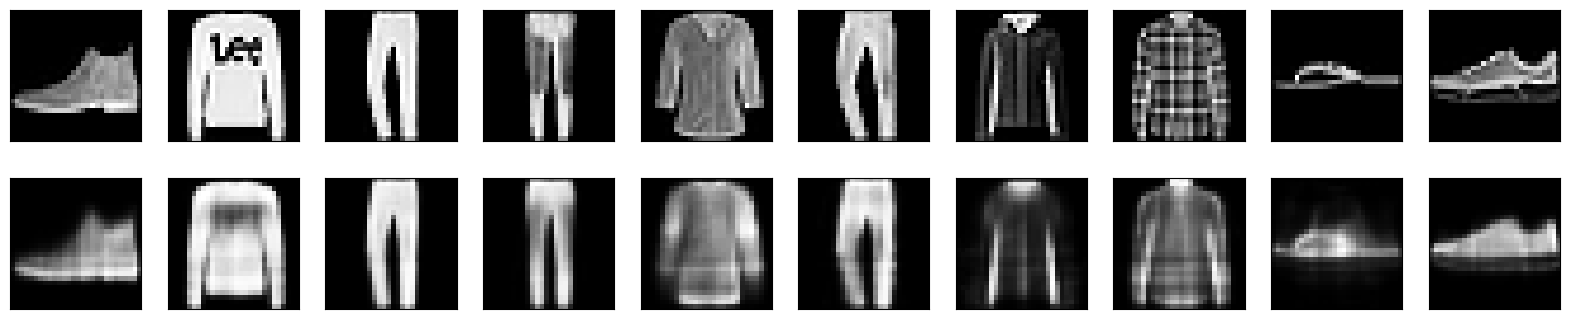

In [ ]:
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)#number of rows nd column
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Function to compress and decompress an image

In [ ]:
def compress_and_decompress(image):
    # Normalize image
    image = image.astype('float32') / 255.
    # Reshape image to match model input shape
    image = np.reshape(image, (1, -1))#new shape
    # Encode image
    encoded_image = encoder_model.predict(image)
    # Decode image
    decoded_image = decoder_model.predict(encoded_image)
    # Reshape decoded image to original shape
    decoded_image = np.reshape(decoded_image, (28, 28))
    return decoded_image

Example usage of compress_and_decompress function

In [ ]:
sample_image = x_test[0]
reconstructed_image = compress_and_decompress(sample_image)

1/1 [==============================] - 0s 21ms/step


Visualize original and reconstructed image

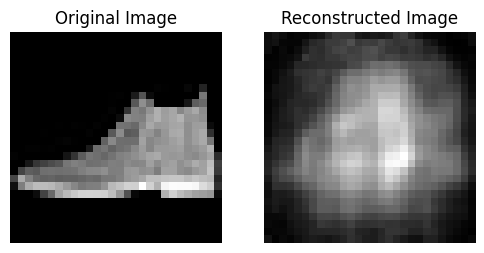

In [ ]:
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)#rows column position of the subplot
plt.title('Original Image')
plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title('Reconstructed Image')
plt.imshow(reconstructed_image, cmap='gray')
plt.axis('off')
plt.show()